## This assignment has two parts. In the first part, you will implement the PCA and the k-means algorithms. In the second part you will implement a mulitclass classification system to classify the data in the provided dataset into seven classes. 

### Part 1 = 50 points 
### Part 2 = 50 points

-------------------------------------------------------------------------------------------------------------

## Part 1: In Part 1 you will use the data provided in the "Dataset1.csv" file. 


#### Before clustering the data, implement PCA to reduce the dimensionality from 500 to 2.

#### 1.1 Preprocess the data (5 Points)

* Question: What pre-processing method will you use and why?

In [25]:
#import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import loadtxt
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, pairwise_distances_argmin, classification_report, silhouette_score
from sklearn import metrics, preprocessing
from sklearn import *
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances




 

# Load "Dataset1.csv" file
#  X where X is a 1000 by 500 (m=1000 and d=500. d is the number of features) 

def load_data(file_name):
    # write your code here
    X = pd.read_csv(file_name)
    return X
X = load_data("Dataset1.csv")
print(X.shape)
X.info()

# # defining x(independent variable) and y(dependent variable)
# x = X.loc[:, X.columns != X.columns[-1]]
# y = X[X.columns[-1]]


# # train-test split
# X_train, X_test, y_train, y_test = train_test_split(x,y , 
#                                    random_state=104,  
#                                    test_size=0.25,  
#                                    shuffle=True) 

(999, 500)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 500 entries, -8.076851053693729909e+00 to -1.032833458670041296e+02
dtypes: float64(500)
memory usage: 3.8 MB


In [26]:
def pre_process(X):
    # write your code here
#     X = preprocessing.normalize(X)
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    return X

#### 1.2 Implement PCA to reduce the dimensionality to 2 (10 points if from scratch, 5 points if using a PCA function from a library)

In [27]:
# the below function takes X as (m by 500) and return it as (m by 2) after performing PCA. 
# If implementing from scratch, you can use functions from numpy and numpy.linalg etc
def my_PCA(X):
    # write your code here
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
 
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    n_components = 2 #you can select any number of components.
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    X_2d = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()


    
    return X_2d    

(999, 2)


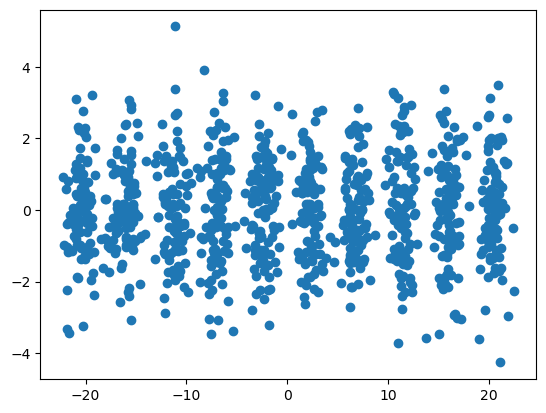

In [28]:
X = pre_process(X)
X_2d = my_PCA(X)
# check out the shape and scatter plot the points
print(X_2d.shape)
plt.scatter(X_2d[:,0],X_2d[:,1])

### K-means

#### 1.3 Start by implementing a function that randomly initialises centroids (5 points).

In [29]:
import sklearn.cluster 

#input:
#k: number of centers
#X: the data
# return
# centroids is a k by 2 
def initialise_centroids(X,k):    
#     centroids = []
#     #Place K centroids at random locations
#     for i in range(k):
#         centroid = X[random.randint(0,149)]
# #         centroid = X.apply(lambda x: float(x.sample()))
#         centroids.append(centroid)
    m, n = X.shape  
    centroid_indices = np.random.choice(m, k, replace = False)
    centroids = X[centroid_indices]
    return centroids


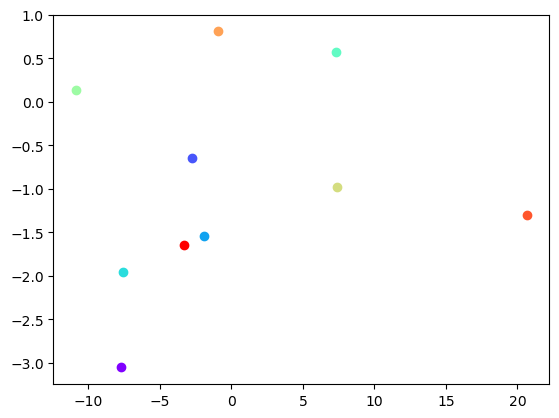

In [30]:
centroids = initialise_centroids(X_2d,10)


# the code below will plot the centroids
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for c in centroids:
    plt.scatter(c[0], c[1], color=next(colors))

#### 1.4 Implement a function that takes the matrix X and a set of centroids and assigns each point in X to a cluster (5 points)

In [31]:
from scipy.spatial.distance import cdist
#input
# X is a m by 2 point 
# centroids is a k by 2 , the center of k clusters.
#return cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
def assign(X,centroids):
    distances = cdist(X, centroids, metric = 'euclidean')
    assignments = np.argmin(distances, axis = 1)          
    return assignments

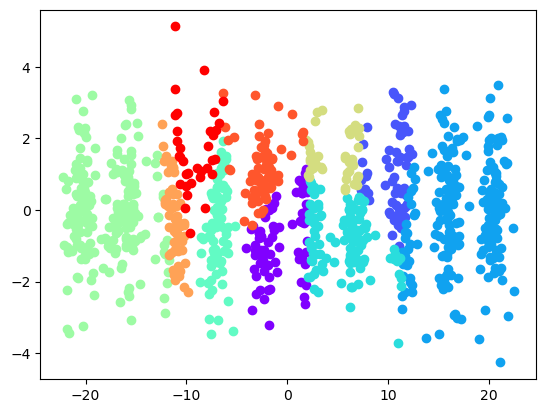

In [70]:
cluster_assignments = assign(X_2d,centroids)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))

#### 1.5 Next, implement a function to compute the value of a cost function given a set of centroids and assignments (5 points)

In [34]:
def cost(X,cluster_assignments,centroids):
    errors = []
    
    for i in range(len(X)):
        #get assigned centroid for each point
        centroid = centroids[cluster_assignments[i]]
    
        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(X[i]) - np.array(centroid))
        
        #append squared error to the list of error
        errors.append(error**2)
        
    #and sum up all the errors
    cost = sum(errors)
    
    return cost

In [69]:
# the code below tests your functions

k=10
centroids = initialise_centroids(X_2d,k)
cluster_assignments = assign(X_2d,centroids)
# new_centroids = new_centroids(X_2d, centroids, cluster_assignments, k)
c = cost(X_2d,cluster_assignments,centroids)
print(c)


13892.80431020493


In [41]:
#function to calculate new centroids
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)
    return new_centroids

#### 1.6 Implement a function to perform the k-means algorithm using the functions you implemented above (20 points, 10 if you use a kmean function from a library)

In [52]:
def My_Kmeans(X,k,num_of_iterations, tol = pow(10,-4)):
    
    i = -1
    all_sse = []
    assignments = []
    centroids = initialise_centroids(X, k)

    while (len(all_sse)<=1 or (i < num_of_iterations and np.absolute(all_sse[i] - all_sse[i-1])/all_sse[i-1] >= tol)):
        i += 1
        cluster_assignments = assign(X, centroids)
        centroids = new_centroids(X, centroids, cluster_assignments, k)
        sse_kmeans = cost(X, cluster_assignments, centroids)
#         print(sse_kmeans)
        all_sse.append(sse_kmeans)        
    
    return cluster_assignments , centroids

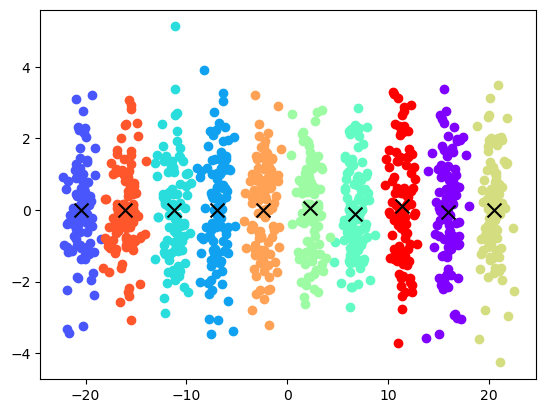

In [59]:
k = 10
centroids = []
cluster_assignments , centroids = My_Kmeans(X_2d,k,10000)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

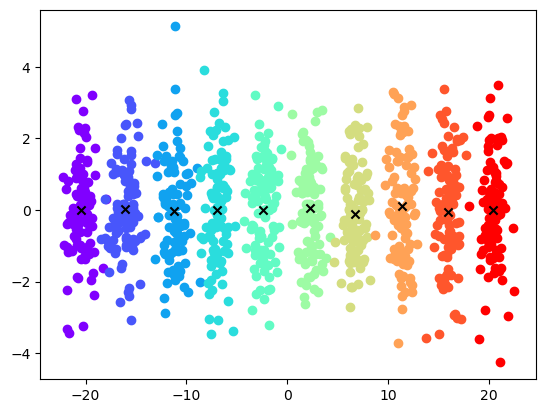

In [56]:
k = 10
cluster_assignments = load_data("True_clusters_IDs.csv")
centroids = []

cluster_assignments = cluster_assignments.values.flatten()
for idx in range(k): 
    temp_cent = X_2d[cluster_assignments==idx].mean(axis=0)             
    centroids.append(temp_cent)
       
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for i in range(k):
    plt.scatter(X_2d[cluster_assignments==i,0], X_2d[cluster_assignments==i,1], color=next(colors))
    plt.scatter(centroids[i][0],centroids[i][1],marker="x",s=35,c='k')
    
    
# for idx in range(k): 
#     mask = cluster_assignments.values.flatten() == idx
#     temp_cent = X_2d[mask].mean(axis=0)     
#     centroids.append(temp_cent)

# # the code below will plot the points color-coded according to their cluster
# colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
# for i in range(k):
#     plt.scatter(X_2d[cluster_assignments.values.flatten() ==i,0], X_2d[cluster_assignments.values.flatten() == i,1], color=next(colors))
#     if 0<= i <= len(centroids):
#         plt.scatter(centroids[i][0],centroids[i][1],marker="x",s=100,c='k')
    

# Part 2 (50 Marks)

### You will use the data provided in the **"Dataset2.xlxs"** file in part 2 of the assignment. 
### The dataset consists of 13611 samples belonging to seven different classes. Each sample has 16 features. 

* Objective: Using the provided dataset, develop a seven class classification method.

* Evaluation Criteria: Your points will be based on the final **average accuracy** achieved by your method in a **10-fold cross validation** framework.

    * 25 marks for achieving a classification accuracy above 82% and upto 87.92%         

    * 40 marks for achieving a classification accuracy above 87.92% and up to 90.0%  

    * 45 marks for achieving a classification accuracy above 90.0% and upto 93.13% 

    * 50 marks for achieving a classification accuracy above 93.13%.     

* You have the freedom to employ any pre-processing, classifiers, and 
post-processing pipeline that you find applicable. Feel free to experiment with 
a wide range of machine learning methods to improve the performance of your system. 

* Your claim and results must be reproducable. 

* To ensure the reproducibility of your results and claims, it is essential that you save both your trained models, hyperparameter specifications,  and the random seeds used throughout your experiments. Saving your models will allow reproducing the achieved accuracy, and recording the random seeds will help validate any randomness in your processes.  



In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt


# Step 1: Load the Dataset
df = pd.read_excel("Dataset2.xlsx") 

# Assuming your data has 16 features and a 'target' column containing class labels
X = df.iloc[:, 0:-1] 
y = df.iloc[:, -1] 

# # Encode class labels (if they are strings)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)



# Step 2: Model Selection and Training

# model = RandomForestClassifier(n_estimators=1000, random_state=100,max_depth=100)

# model = linear_model.LogisticRegression(max_iter= 4000, solver= 'saga', random_state= 42)
model = RandomForestClassifier(n_estimators=102, random_state=42)
model.fit(X_train, y_train)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)


# 10-fold cross-validation
kf =KFold(n_splits=10, shuffle=True, random_state=115)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')



# Calculate the average accuracy across all folds
average_accuracy = np.mean(scores)


# Save the trained model for reproducibility
joblib.dump(model, 'trained_model.pkl')

# Save the random state used
random_state = 100  

with open('random_state.txt', 'w') as f:
    f.write(str(random_state))

# Printing the accuracies
print(f"Test Set Accuracy: {test_accuracy:.2%}")
print(f'Scores for each fold are: {scores}')
print(f"Average Cross-Validation Accuracy: {average_accuracy:.2%}")



# Load the trained model and random state for reproducibility
loaded_model = joblib.load('trained_model.pkl')
with open('random_state.txt', 'r') as f:
    loaded_random_state = int(f.read())

Test Set Accuracy: 92.11%
Scores for each fold are: [0.93387215 0.93166789 0.9331374  0.92285084 0.92799412 0.92652461
 0.92285084 0.9331374  0.92211609 0.91036003]
Average Cross-Validation Accuracy: 92.65%
